In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# import cleaned dataset
df = pd.read_csv("cleaned_dataframe.csv")
df2 = df

In [3]:
# transform data into yearly averages for each city for each year
grouped_df = df.groupby(['City', 'Year']).agg({
    'Latitude': 'first',
    'Longitude': 'first', 
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()

In [4]:
grouped_df

,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
0,Cairo,1880,29.74,31.38,21.201083,1.102167
1,Cairo,1881,29.74,31.38,21.559833,0.953167
2,Cairo,1882,29.74,31.38,20.378250,0.892750
3,Cairo,1883,29.74,31.38,20.646917,0.739833
4,Cairo,1884,29.74,31.38,20.232167,0.815667
...,...,...,...,...,...,...
1335,Tokyo,2009,36.17,139.23,13.546083,0.235250
1336,Tokyo,2010,36.17,139.23,13.820500,0.220917
1337,Tokyo,2011,36.17,139.23,13.321833,0.229833
1338,Tokyo,2012,36.17,139.23,13.113250,0.297667


In [5]:
unique_cities = df['City'].unique()
unique_cities

array(['Cairo', 'Cape Town', 'Delhi', 'Ho Chi Minh City', 'Los Angeles',
       'Melbourne', 'New York', 'Paris', 'Santiago', 'Tokyo'],
      dtype=object)

In [6]:
# checking for balanced panel
for city in unique_cities: 
    rowCount = grouped_df['City'].value_counts()[city]
    print(f'{city}: {rowCount}')

Cairo: 134
Cape Town: 134
Delhi: 134
Ho Chi Minh City: 134
Los Angeles: 134
Melbourne: 134
New York: 134
Paris: 134
Santiago: 134
Tokyo: 134


In [7]:
grouped_df.describe()

,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,1946.500000,12.539000,25.696000,15.876284,0.453886
std,38.695832,32.258308,87.753717,6.598033,0.231422
min,1880.000000,-37.780000,-118.700000,4.506667,0.171417
25%,1913.000000,-32.950000,-69.890000,10.815312,0.288771
50%,1946.500000,28.935000,24.785000,14.694458,0.397333
75%,1980.000000,36.170000,107.180000,21.447708,0.535604
max,2013.000000,49.030000,144.410000,28.455000,1.676273


In [8]:
# create correlation matrix
corr_matrix = grouped_df.corr()
corr_matrix

,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
Year,1.000000e+00,-1.427018e-15,-1.959270e-15,0.053425,-0.544938
Latitude,-1.427018e-15,1.000000e+00,-1.679180e-01,0.165571,-0.314107
Longitude,-1.959270e-15,-1.679180e-01,1.000000e+00,0.426298,-0.219021
AverageTemperature,5.342546e-02,1.655711e-01,4.262977e-01,1.000000,0.038295
AverageTemperatureUncertainty,-5.449381e-01,-3.141068e-01,-2.190214e-01,0.038295,1.000000


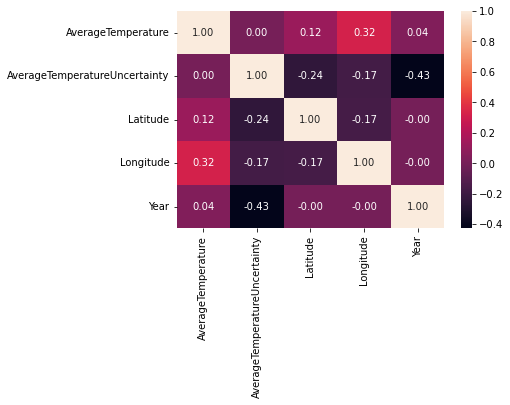

In [9]:
# correlation heat map
sns.heatmap(df.corr(), annot = True, fmt='.2f')

plt.show()

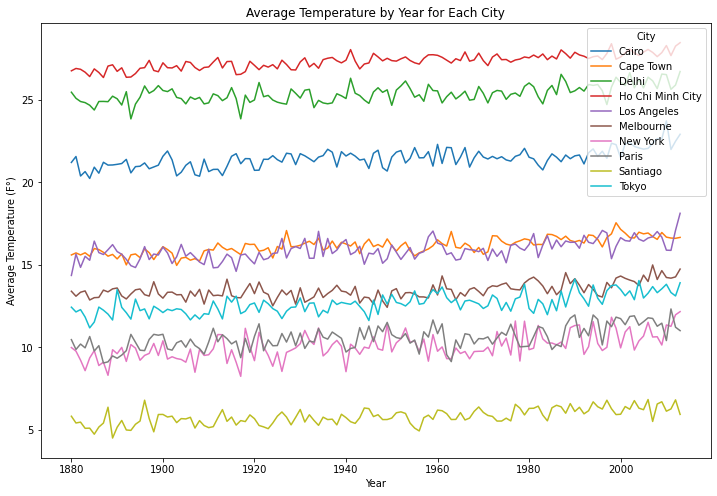

In [10]:
# plot each city's temperature by year
plt.figure(figsize=(12, 8))

sns.lineplot(x='Year', y='AverageTemperature', hue='City', data=grouped_df)

plt.title('Average Temperature by Year for Each City')
plt.xlabel('Year')
plt.ylabel('Average Temperature (F°)')

plt.show()

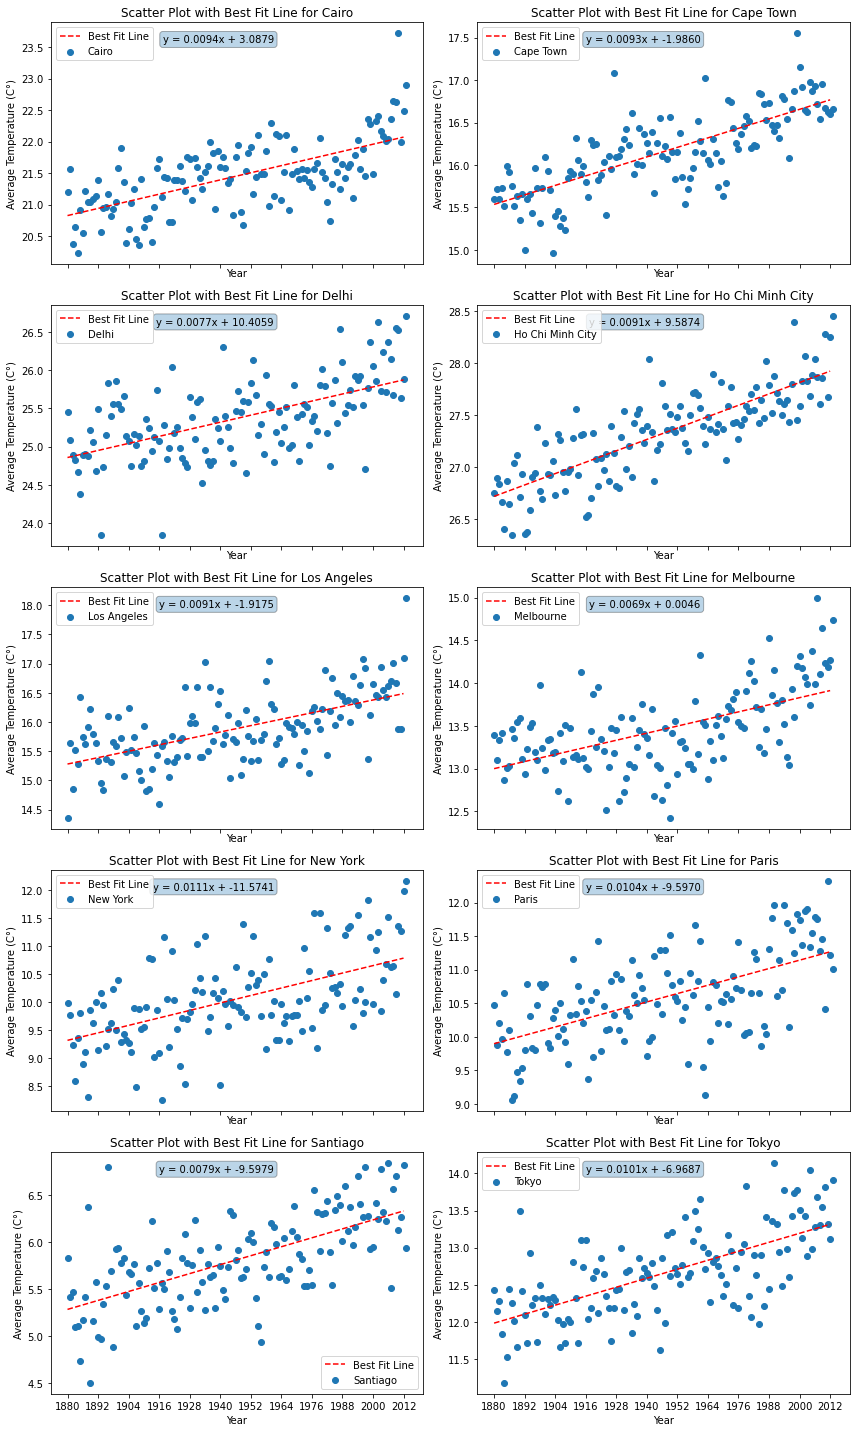

In [14]:
# individual city's temp by year with line of best fit
num_rows = int(np.ceil(len(unique_cities) / 2))
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)

axs = axs.flatten()

for i, city in enumerate(unique_cities):
    city_data = grouped_df[grouped_df['City'] == city]
    
    # Scatter plot
    axs[i].scatter(city_data['Year'], city_data['AverageTemperature'], label=city)
    
    # Line of best fit
    z = np.polyfit(city_data['Year'], city_data['AverageTemperature'], 1)
    p = np.poly1d(z)
    best_fit_line_x = np.arange(city_data['Year'].min(), city_data['Year'].max() + 1, 4)
    axs[i].plot(best_fit_line_x, p(best_fit_line_x), color='red', linestyle='--', label='Best Fit Line')  
    
    equation_text = f'y = {z[0]:.4f}x + {z[1]:.4f}'
    axs[i].text(0.6, 0.95, equation_text, transform=axs[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.3), fontsize=10)
    
    axs[i].set_title(f'Scatter Plot with Best Fit Line for {city}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Temperature (C°)')
    axs[i].legend()

plt.xticks(np.arange(df['Year'].min(), df['Year'].max() + 1, 12))

plt.tight_layout()

plt.show()

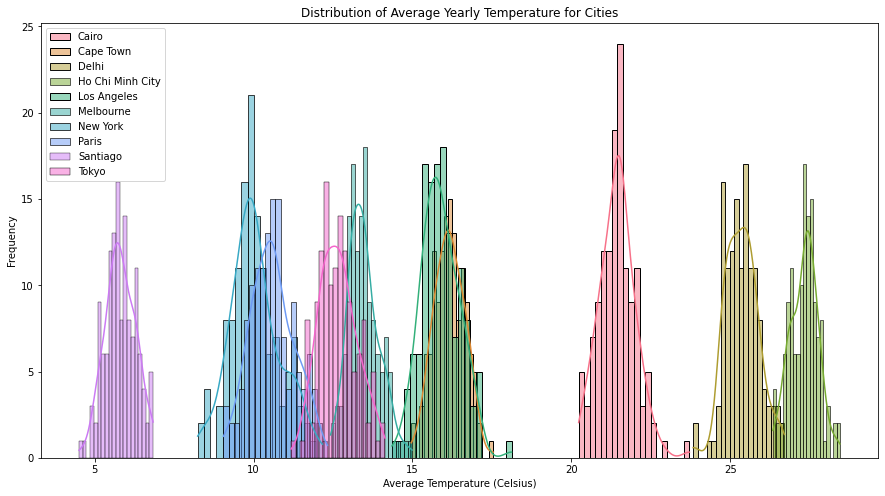

In [12]:
# Create histograms for the average temperature distribution of each city
plt.figure(figsize=(15, 8))
city_palette = sns.color_palette('husl', n_colors=len(grouped_df['City'].unique()))

for i, city in enumerate(grouped_df['City'].unique()):
    city_data = grouped_df[grouped_df['City'] == city]
    sns.histplot(city_data['AverageTemperature'], kde=True, label=city, bins=20, color=city_palette[i])

plt.title('Distribution of Average Yearly Temperature for Cities')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [13]:
# export panel data
grouped_df.to_csv('Panel_Data.csv', index=False)